# 📏 Güven Aralığı: Gerçek Ortalamayı Tahminlemenin Yolu

## Giriş: Bilgi, Kesinlikten Uzakken Ne Yaparsın?

Diyelim ki bir ürünün ortalama fiyatı 180 TL çıktı.  
Ama elindeki veri sadece örneklem.  
Gerçek ortalama bu olabilir mi? Yoksa %95 güvenle nerede olmalı?

## 🔍 Güven Aralığı Nedir?

**Güven aralığı**, gerçek parametrenin (örneğin anakütle ortalaması)  
belirli bir güven düzeyiyle (örneğin %95) yer alabileceği aralıktır.

📌 Örnek:
- Elimizde 100 satıcının satış verisi var.
- Ortalama satış: 180 TL
- Standart sapma: 40 TL
- Güven düzeyi: %95

→ Gerçek ortalamanın **%95 ihtimalle 172–188 TL arasında olduğunu söyleriz.**

## 🧠 Neden Önemlidir?

| Sebep | Açıklama |
|--------|----------|
| ✅ **Tahmine dayalı karar** | Anakütleyi tam bilemeyebiliriz ama güven aralığıyla tahmin ederiz |
| ✅ **Yanılma payı belli** | Ne kadar yanılma payına sahip olduğumuzu görürüz |
| ✅ **İstatistiksel anlamlılık** | Farklı grupları karşılaştırırken kullanılır |
| ✅ **Model performansını değerlendirmek** | Regresyon modellerinin hata payını anlamada |

📌 Veri bilimde her şey tahmindir.  
Ve tahminin yanında **güven aralığı** yoksa → karar da yoktur.

## 📐 Güven Aralığı Nasıl Hesaplanır?

### Ortalama İçin Formül:

$$
\text{Güven Aralığı} = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}
$$

#### Python Kodu:

In [1]:
import numpy as np
from scipy.stats import norm

# Sample veri
n = 100
ortalama = 180
std = 40
guven_duzeyi = 0.95

# Z skoru hesaplama
z_skoru = norm.ppf((1 + guven_duzeyi) / 2)
print(f"Z Skoru (%95 için): {z_skoru:.2f}")

# Standart hata
standart_hata = std / np.sqrt(n)

# Güven aralığı sınırları
alt_sinir = ortalama - z_skoru * standart_hata
ust_sinir = ortalama + z_skoru * standart_hata

print(f"%95 Güven Aralığı: ({alt_sinir:.2f}, {ust_sinir:.2f})")

Z Skoru (%95 için): 1.96
%95 Güven Aralığı: (172.16, 187.84)


📌 Bu aralıkta gerçek ortalama var demektir → %5 riskle yanılıyoruz.

## 📊 Oran İçin Güven Aralığı

Bir anket yapılıyor.  
Toplam 100 kişiye soruluyor:  
“Bu ürünü tekrar alır mısınız?”  
70 kişi “evet” diyor → oranı `p̂ = 0.70`

### Formülü:

$$
\text{Güven Aralığı} = \hat{p} \pm z \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

#### Python Kodu:

In [2]:
# Oran için güven aralığı
n_oran = 100
p_hat = 0.70
z_skoru = norm.ppf(1 - (1 - guven_duzeyi)/2)  # %95 için yine 1.96

hata_payi = z_skoru * np.sqrt((p_hat * (1 - p_hat)) / n_oran)
alt_oran = p_hat - hata_payi
ust_oran = p_hat + hata_payi

print(f"%95 Güven Aralığı (oran): ({alt_oran:.2f}, {ust_oran:.2f})")

%95 Güven Aralığı (oran): (0.61, 0.79)


📌 Yani gerçek oran %61 ile %79 arasında → %95 olasılıkla

## 🛠️ Sample Veri Üzerinden Görelim

Elimizdeki sample veri şu şekildeydi:

```
    fiyat  satis_adedi
0  274.84            6
1  243.09           11
2  282.38            8
3  326.15           10
4  238.29            9
...
```

Şimdi `fiyat` değişkeni üzerinden güven aralığı hesaplayalım.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
veri_sayisi = 1000

# Yapay satış verisi oluşturma
fiyatlar = np.round(np.random.normal(loc=250, scale=50, size=veri_sayisi), 2)
satis_adetleri = np.random.poisson(lam=10, size=veri_sayisi)

# DataFrame'e çevirme
df = pd.DataFrame({
    "fiyat": fiyatlar,
    "satis_adedi": satis_adetleri
})

print("Sample veri seti - ilk 5 satır:")
print(df.head())

Sample veri seti - ilk 5 satır:
    fiyat  satis_adedi
0  274.84            6
1  243.09           11
2  282.38            8
3  326.15           10
4  238.29            9


In [5]:


x = df['fiyat']
n = len(x)
ortalama_x = x.mean()
std_x = x.std()

# Güven düzeyi ve Z skoru
guven_duzeyi = 0.95
z_skoru = norm.ppf((1 + guven_duzeyi) / 2)

# Standart hata
standart_hata_x = std_x / np.sqrt(n)

# Alt ve üst sınır
alt = ortalama_x - z_skoru * standart_hata_x
ust = ortalama_x + z_skoru * standart_hata_x

print(f"Fiyat %95 Güven Aralığı: ({alt:.2f}, {ust:.2f})")

Fiyat %95 Güven Aralığı: (247.93, 254.00)


📌 Bu kod sayesinde artık model kurarken  
gerçek ortalamaya ne kadar yakın olduğunuzu görebilirsiniz.


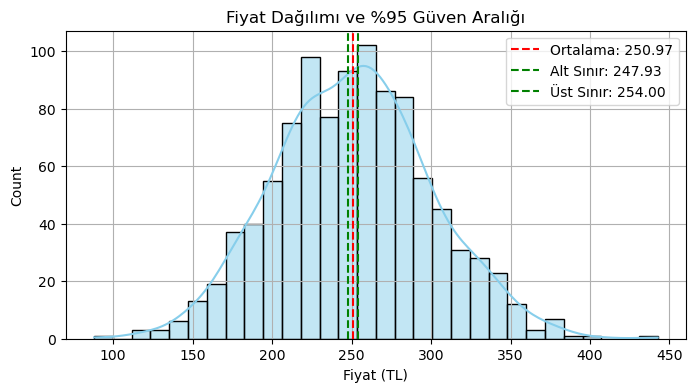

In [6]:
# Güven Aralığını Görselleştirelim

plt.figure(figsize=(8, 4))
sns.histplot(df['fiyat'], kde=True, color='skyblue', bins=30)
plt.axvline(ortalama_x, color='red', linestyle='--', label=f'Ortalama: {ortalama_x:.2f}')
plt.axvline(alt, color='green', linestyle='--', label=f'Alt Sınır: {alt:.2f}')
plt.axvline(ust, color='green', linestyle='--', label=f'Üst Sınır: {ust:.2f}')
plt.title("Fiyat Dağılımı ve %95 Güven Aralığı")
plt.xlabel("Fiyat (TL)")
plt.legend()
plt.grid(True)
plt.show()

📌 Bu grafikte:
- Ortalama (kırmızı)
- Güven aralığı (yeşil çizgiler)

## 🧪 Güven Aralığı ve Hipotez Testleri Bağlantısı

Güven aralığı, hipotez testleriyle doğrudan ilişkilidir.

📌 Örneğin:
- Bir ilacın etkisi ortalama olarak 180 mg/dL kan şekerini düşürüyor.
- Güven aralığı: (172, 188)
- Eğer sıfır hipotezi: "Etki yok"
→ Güven aralığı 0’ı içeriyorsa → etkisizdir.

In [10]:
# güven aralığı analizi için net iş bağlamı ve görselleştirmelerle kapsamlı bir öğretici veri seti ve Python kodu:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, Markdown

# Set random seed for reproducibility
np.random.seed(42)

# Create realistic e-commerce dataset
n_customers = 500
data = {
    'customer_id': range(1, n_customers+1),
    'age': np.random.normal(loc=35, scale=10, size=n_customers).astype(int),
    'loyalty_days': np.random.exponential(scale=365, size=n_customers).astype(int),
    'avg_order_value': np.random.gamma(shape=2, scale=50, size=n_customers),
    'discount_used': np.random.choice([0, 5, 10, 15], 
                                    p=[0.4, 0.3, 0.2, 0.1], 
                                    size=n_customers),
    'product_returns': np.random.poisson(lam=0.3, size=n_customers)
}

# Generate conversion rate with business logic
base_conversion = 0.2
p_values = base_conversion + \
    0.001 * data['loyalty_days'] + \
    0.0005 * data['avg_order_value'] - \
    0.01 * data['product_returns'] - \
    0.002 * data['age']

# Ensure p is between 0 and 1
p_values = np.clip(p_values, 0, 1)

data['converted'] = np.random.binomial(1, p=p_values, size=n_customers)


df = pd.DataFrame(data)

# Add some real-world anomalies
df.loc[::50, 'avg_order_value'] *= 1.8  # Premium customers
df.loc[::20, 'converted'] = 1          # Marketing campaign effect

# Display sample data
display(Markdown("### 🛒 E-Commerce Sample Data (First 5 Rows)"))
display(df.head().style.format({
    'avg_order_value': '{:.2f}',
    'loyalty_days': '{:d}'
}))

### 🛒 E-Commerce Sample Data (First 5 Rows)

,customer_id,age,loyalty_days,avg_order_value,discount_used,product_returns,converted
0,1,39,378,131.41,15,1,1
1,2,33,308,93.17,10,0,1
2,3,41,160,109.47,5,0,0
3,4,50,1571,60.43,0,0,1
4,5,32,339,96.29,10,1,1


In [13]:
# 1. Confidence Interval for Average Order Value
display(Markdown("\n### 📏 Confidence Interval for Average Order Value"))

mean_aov = df['avg_order_value'].mean()
std_aov = df['avg_order_value'].std()
n = len(df)
confidence_level = 0.95

# Calculate critical value (z-score for large n, t-score for small n)
if n > 30:
    critical_value = stats.norm.ppf((1 + confidence_level)/2)
else:
    critical_value = stats.t.ppf((1 + confidence_level)/2, df=n-1)

margin_of_error = critical_value * (std_aov/np.sqrt(n))
ci_lower = mean_aov - margin_of_error
ci_upper = mean_aov + margin_of_error

display(Markdown(f"""
- **Sample Mean**: {mean_aov:.2f} TL
- **Standard Deviation**: {std_aov:.2f} TL
- **Sample Size**: {n}
- **Critical Value**: {critical_value:.3f}
- **Margin of Error**: ±{margin_of_error:.2f} TL
- **{confidence_level*100:.0f}% Confidence Interval**: ({ci_lower:.2f}, {ci_upper:.2f}) TL
"""))


### 📏 Confidence Interval for Average Order Value


- **Sample Mean**: 105.51 TL
- **Standard Deviation**: 72.00 TL
- **Sample Size**: 500
- **Critical Value**: 1.960
- **Margin of Error**: ±6.31 TL
- **95% Confidence Interval**: (99.20, 111.82) TL


In [14]:
# 2. Confidence Interval for Conversion Rate (Proportion)
display(Markdown("\n### 🔄 Confidence Interval for Conversion Rate"))

conversions = df['converted'].sum()
p_hat = conversions/n

# Wald interval (normal approximation)
margin_of_error_prop = critical_value * np.sqrt((p_hat*(1-p_hat))/n)
ci_lower_prop = max(0, p_hat - margin_of_error_prop)  # Can't be negative
ci_upper_prop = min(1, p_hat + margin_of_error_prop)  # Can't exceed 1

display(Markdown(f"""
- **Sample Proportion**: {p_hat:.3f} ({conversions} conversions)
- **{confidence_level*100:.0f}% Confidence Interval**: ({ci_lower_prop:.3f}, {ci_upper_prop:.3f})
- **Interpretation**: We're 95% confident the true conversion rate is between {ci_lower_prop*100:.1f}% and {ci_upper_prop*100:.1f}%
"""))


### 🔄 Confidence Interval for Conversion Rate


- **Sample Proportion**: 0.530 (265 conversions)
- **95% Confidence Interval**: (0.486, 0.574)
- **Interpretation**: We're 95% confident the true conversion rate is between 48.6% and 57.4%


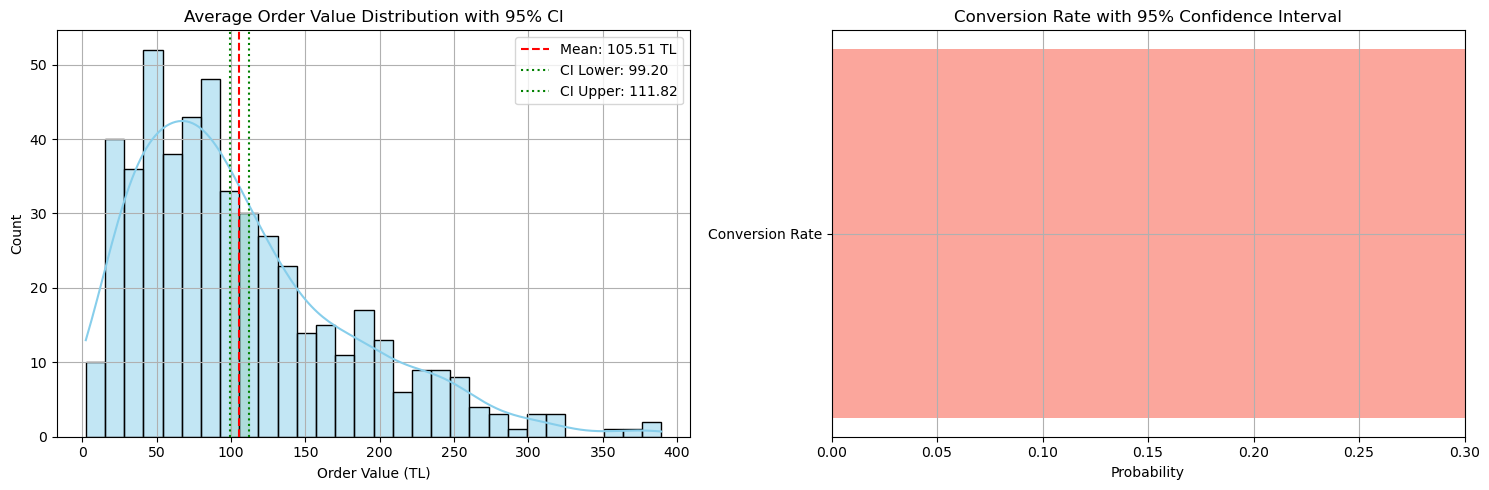

In [15]:
# 3. Visualization
plt.figure(figsize=(15, 5))

# Distribution plot with CI
plt.subplot(1, 2, 1)
sns.histplot(df['avg_order_value'], kde=True, color='skyblue', bins=30)
plt.axvline(mean_aov, color='red', linestyle='--', label=f'Mean: {mean_aov:.2f} TL')
plt.axvline(ci_lower, color='green', linestyle=':', label=f'CI Lower: {ci_lower:.2f}')
plt.axvline(ci_upper, color='green', linestyle=':', label=f'CI Upper: {ci_upper:.2f}')
plt.fill_betweenx(y=[0, 30], x1=ci_lower, x2=ci_upper, color='green', alpha=0.1)
plt.title('Average Order Value Distribution with 95% CI')
plt.xlabel('Order Value (TL)')
plt.legend()
plt.grid(True)

# Conversion rate CI visualization
plt.subplot(1, 2, 2)
plt.barh(['Conversion Rate'], [p_hat], xerr=[[p_hat-ci_lower_prop], [ci_upper_prop-p_hat]], 
        color='salmon', alpha=0.7)
plt.xlim(0, 0.3)
plt.title('Conversion Rate with 95% Confidence Interval')
plt.xlabel('Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# Önce hesaplamaları yap
ci_lower_pct = ci_lower_prop * 100
ci_upper_pct = ci_upper_prop * 100

# 4. Business Decision Context
display(Markdown("""
### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between {ci_lower:.2f}-{ci_upper:.2f} TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between {ci_lower_pct:.1f}%-{ci_upper_pct:.1f}%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width ({margin_of_error:.2f} TL) indicates estimation precision
   - Narrower intervals require larger samples
""".format(ci_lower=ci_lower, ci_upper=ci_upper, 
           ci_lower_pct=ci_lower_pct, ci_upper_pct=ci_upper_pct,
           margin_of_error=margin_of_error)))


### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between 99.20-111.82 TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between 48.6%-57.4%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width (6.31 TL) indicates estimation precision
   - Narrower intervals require larger samples


In [19]:
display(Markdown(f"""
### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between {ci_lower:.2f}-{ci_upper:.2f} TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between {ci_lower_prop*100:.1f}%-{ci_upper_prop*100:.1f}%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width ({margin_of_error:.2f} TL) indicates estimation precision
   - Narrower intervals require larger samples
"""))


### 💡 Business Implications

1. **Pricing Strategy**: 
   - With 95% confidence, true average order value is between 99.20-111.82 TL
   - Premium products should target the upper range

2. **Marketing Budget**:
   - True conversion likely falls between 48.6%-57.4%
   - Campaign success should be evaluated against this baseline

3. **Inventory Planning**:
   - The CI width (6.31 TL) indicates estimation precision
   - Narrower intervals require larger samples
